In [58]:
import json
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import iplot

In [76]:
def read_iperf_log_to_df(file):
    with open(file) as f:
        json_data = json.load(f)

    intervals = json_data['intervals']
    zero_interval_streams = [item['streams'][0] for item in intervals]
    df = pd.json_normalize(zero_interval_streams)
    df.index = pd.to_datetime(df['start'], unit='s')
    return df

In [77]:
def plot_cwnd(df):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df['snd_cwnd'], name='cwnd', mode='lines'))
    fig.show()

In [123]:
def plot_receive_rate(df):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df['bits_per_second'], name='bps', mode='lines'))
    fig.show()

In [110]:
def plot_rtt(df):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.index, y=df['rtt'], name='rtt', mode='lines'))
    fig.show()

In [140]:
client_df = read_iperf_log_to_df('../iperf3test/client.json')
server_df = read_iperf_log_to_df('../iperf3test/server.json')

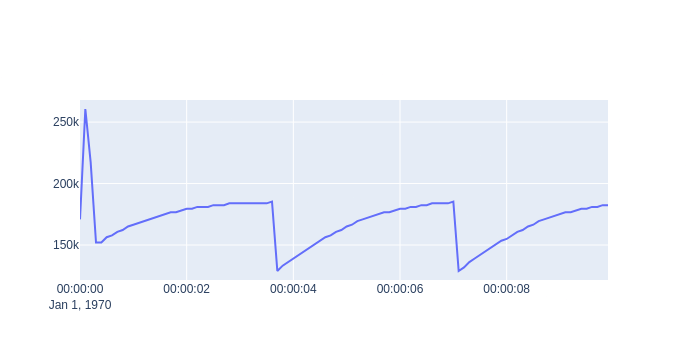

In [141]:
plot_cwnd(client_df)

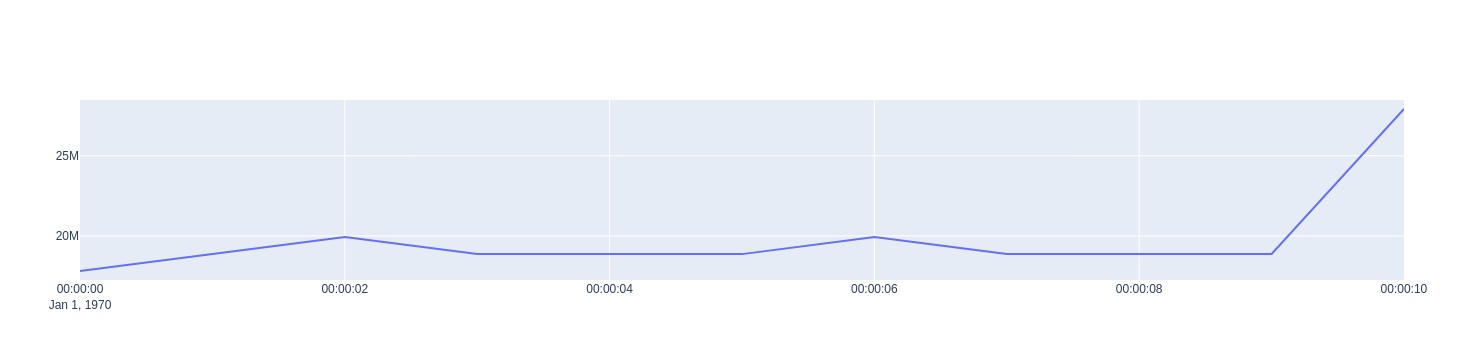

In [142]:
plot_receive_rate(server_df)

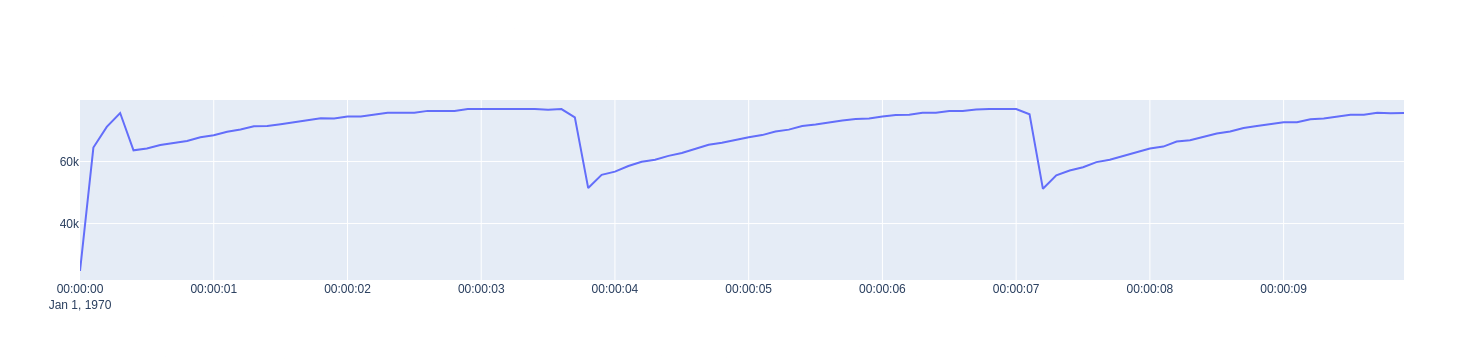

In [143]:
plot_rtt(client_df)